## 7.12　入力変数の 4 次元化


In [1]:
# !pip install japanize_matplotlib | tail -n 1
# !pip install torchviz | tail -n 1
# !pip install torchinfo | tail -n 1

In [2]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import japanize_matplotlib
import torch.optim as optim
import matplotlib.pyplot as plt
from torchviz import make_dot
from torchinfo import summary
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['axes.grid'] = True
np.set_printoptions(suppress=True, precision=4)

In [5]:
iris = load_iris()
x_org, y_org = iris.data, iris.target
print('元データ', x_org.shape, y_org.shape)

元データ (150, 4) (150,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, train_size=75, test_size=75, random_state=123)
n_input = x_train.shape[1]
print('入力データ(x)')
print(x_train[:5, :])
print(f'入力次元数: {n_input}')

入力データ(x)
[[6.3 3.3 4.7 1.6]
 [7.  3.2 4.7 1.4]
 [5.  3.  1.6 0.2]
 [6.4 2.8 5.6 2.1]
 [6.3 2.5 5.  1.9]]
入力次元数: 4


In [7]:
n_output = len(list(set(y_train)))
print(f'n_input: {n_input} n_output: {n_output}')

n_input: 4 n_output: 3


In [8]:
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

In [9]:
class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = nn.Linear(n_input, n_output)

    self.l1.weight.data.fill_(1.0)
    self.l1.bias.data.fill_(1.0)

  def forward(self, x):
    x1 = self.l1(x)
    return x1

In [10]:
lr = 0.01
net = Net(n_input, n_output)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 10000
history = np.zeros((0, 5))

In [11]:
for epoch in range(num_epochs):
  optimizer.zero_grad()
  outputs = net(inputs)
  loss = criterion(outputs, labels)
  loss.backward()
  optimizer.step()

  predicted = torch.max(outputs, 1)[1]
  train_loss = loss.item()
  train_acc = (predicted == labels).sum() / len(labels)

  outputs_test = net(inputs_test)
  loss_test = criterion(outputs_test, labels_test)

  predicted_test = torch.max(outputs_test, 1)[1]
  val_loss = loss_test.item()
  val_acc = (predicted_test == labels_test).sum() / len(labels_test)

  if (epoch % 10 == 0):
    print(f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f} val_acc: {val_acc:.5f}')
    item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

Epoch [0/10000], loss: 1.09861 acc: 0.30667 val_loss: 1.09158 val_acc: 0.26667
Epoch [10/10000], loss: 1.01848 acc: 0.40000 val_loss: 1.04171 val_acc: 0.26667
Epoch [20/10000], loss: 0.96854 acc: 0.40000 val_loss: 0.98850 val_acc: 0.26667
Epoch [30/10000], loss: 0.92459 acc: 0.65333 val_loss: 0.93996 val_acc: 0.57333
Epoch [40/10000], loss: 0.88568 acc: 0.70667 val_loss: 0.89704 val_acc: 0.62667
Epoch [50/10000], loss: 0.85120 acc: 0.70667 val_loss: 0.85918 val_acc: 0.62667
Epoch [60/10000], loss: 0.82059 acc: 0.70667 val_loss: 0.82572 val_acc: 0.62667
Epoch [70/10000], loss: 0.79335 acc: 0.72000 val_loss: 0.79607 val_acc: 0.62667
Epoch [80/10000], loss: 0.76900 acc: 0.72000 val_loss: 0.76968 val_acc: 0.65333
Epoch [90/10000], loss: 0.74717 acc: 0.72000 val_loss: 0.74610 val_acc: 0.65333
Epoch [100/10000], loss: 0.72750 acc: 0.76000 val_loss: 0.72494 val_acc: 0.69333
Epoch [110/10000], loss: 0.70970 acc: 0.77333 val_loss: 0.70585 val_acc: 0.74667
Epoch [120/10000], loss: 0.69354 acc: 0

In [12]:
print(f'初期状態: 損失: {history[0, 3]:.5f} 精度: {history[0, 4]:.5f}')
print(f'最終状態: 損失: {history[-1, 3]:5f} 精度: {history[-1, 4]:.5f}')

初期状態: 損失: 1.09158 精度: 0.26667
最終状態: 損失: 0.137235 精度: 0.96000


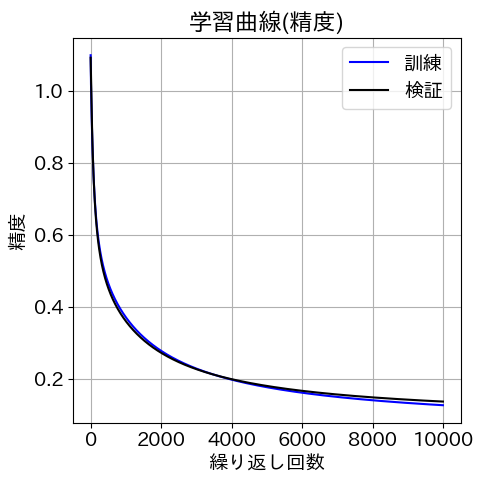

In [13]:
plt.plot(history[:, 0], history[:, 1], 'b', label='訓練')
plt.plot(history[:, 0], history[:, 3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

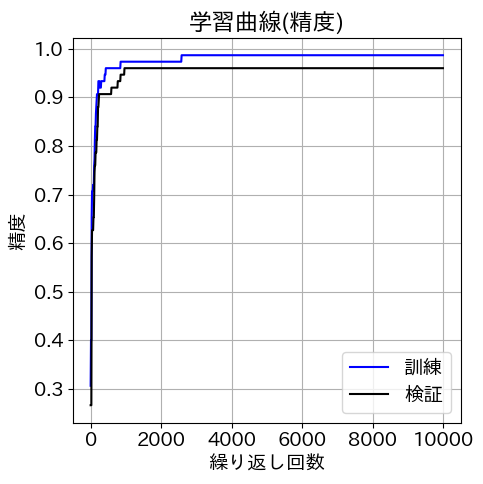

In [14]:
plt.plot(history[:, 0], history[:, 2], 'b', label='訓練')
plt.plot(history[:, 0], history[:, 4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()